In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('../Data_extraction/CarbonEmission.csv')
pd.set_option('display.max_columns', None)
df.head(3)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595


In [100]:
df = pd.read_csv('../Data_extraction/extracted_data_v1.csv')

# change display settings to show all columns
pd.set_option('display.max_columns', None)

df.head(3)

,coal,electricity,natural gas,wood,private,public,walk/bicycle,diesel,electric,hybrid,lpg,petrol,Vehicle Monthly Distance Km,Frequency of Traveling by Air,extra large waste bag,large waste bag,medium waste bag,small waste bag,Waste Bag Weekly Count,CarbonEmission
0,1,0,0,0,0,1,0,0,0,0,0,0,210,2,0,1,0,0,4,2238
1,0,0,1,0,0,0,1,0,0,0,0,0,9,1,1,0,0,0,3,1892
2,0,0,0,1,1,0,0,0,0,0,0,1,2472,0,0,0,0,1,1,2595


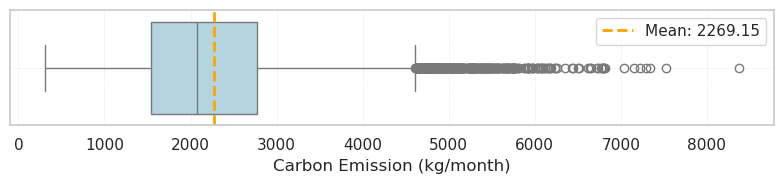

In [101]:
plt.figure(figsize=(8, 2))  
sns.boxplot(data=df, x="CarbonEmission",color='lightblue')
mean = df['CarbonEmission'].mean()
#max = df['CarbonEmission'].max()
#print(max)

# add mean as orange line
plt.axvline(df['CarbonEmission'].mean(), color='orange', linestyle='--', label=f'Mean: {mean:.2f}', linewidth=2)

# Design adjustments
plt.xlabel('Carbon Emission (kg/month)', fontsize=12)
plt.legend(loc='upper right')  

plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)  # Add Light grid

plt.tight_layout()
plt.show()

In [102]:
# calculate Median 
median_CE = df['CarbonEmission'].median()  
print(median_CE)

# create new column
df['lower_half_median'] = df['CarbonEmission'] <= median_CE



2080.0


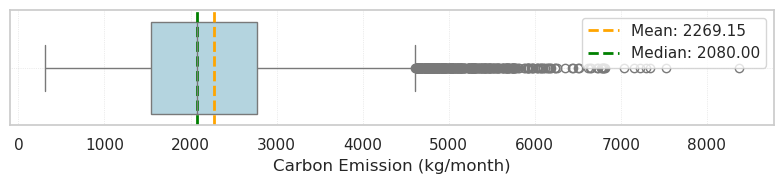

In [103]:
plt.figure(figsize=(8, 2))  
sns.boxplot(data=df, x="CarbonEmission",color='lightblue')
mean = df['CarbonEmission'].mean()

# add mean as orange line
plt.axvline(df['CarbonEmission'].mean(), color='orange', linestyle='--', label=f'Mean: {mean:.2f}', linewidth=2)

# add mean as orange line
plt.axvline(df['CarbonEmission'].median(), color='green', linestyle='--', label=f'Median: {median_CE:.2f}', linewidth=2)

# Design adjustments
plt.xlabel('Carbon Emission (kg/month)', fontsize=12)
plt.legend(loc='upper right')  

plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)  # Add Light grid

plt.tight_layout()
plt.show()

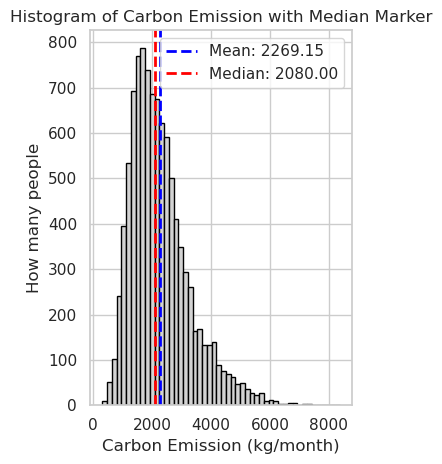

In [104]:
# Create Histogram
plt.subplot(1, 2, 2)  # Histogram
plt.hist(df['CarbonEmission'], bins=50, color='lightgray', edgecolor='black')
# add mean as orange line
plt.axvline(df['CarbonEmission'].mean(), color='blue', linestyle='--', label=f'Mean: {mean:.2f}', linewidth=2)
plt.axvline(median_CE, color='red', linestyle='dashed', label=f'Median: {median_CE:.2f}', linewidth=2)  # Line for the median
plt.legend(loc='upper right') 
plt.title('Histogram of Carbon Emission with Median Marker')
plt.xlabel('Carbon Emission (kg/month)')
plt.ylabel('How many people')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [105]:
# Select one random row
#random_row = df.sample(n=1)

# Specify the row index you want to pick (e.g., row at index 5)
row_index = 4  # Change this to the desired row index

# Select the row using .iloc[] (index-based selection)
selected_row = df.iloc[row_index]
individual = selected_row['CarbonEmission']

# Display the random row
print(selected_row)
print(type(selected_row))
print(selected_row['CarbonEmission'])

coal                                 1
electricity                          0
natural gas                          0
wood                                 0
private                              1
public                               0
walk/bicycle                         0
diesel                               1
electric                             0
hybrid                               0
lpg                                  0
petrol                               0
Vehicle Monthly Distance Km       8457
Frequency of Traveling by Air        3
extra large waste bag                0
large waste bag                      1
medium waste bag                     0
small waste bag                      0
Waste Bag Weekly Count               1
CarbonEmission                    4743
lower_half_median                False
Name: 4, dtype: object
<class 'pandas.core.series.Series'>
4743


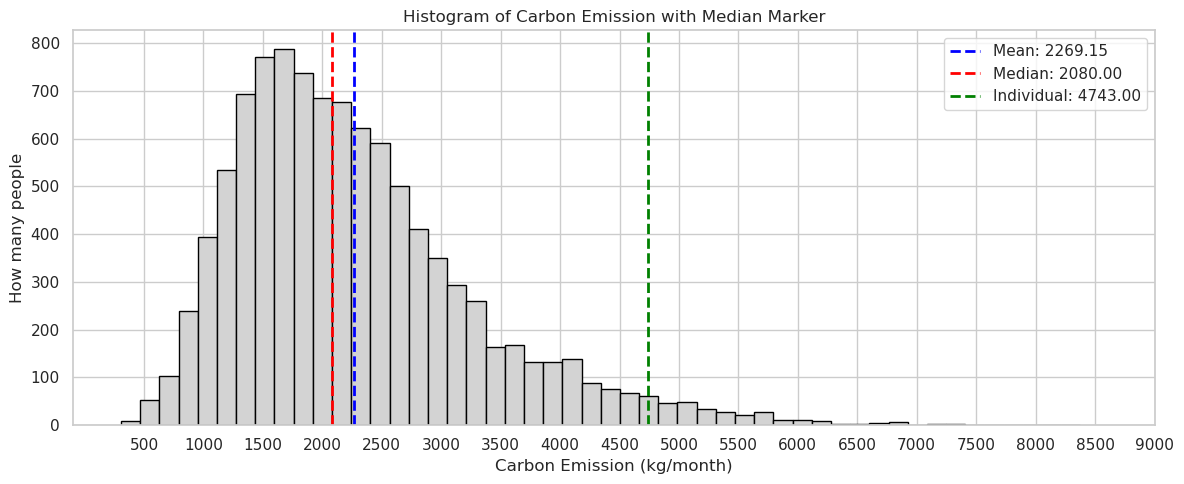

In [106]:
# Create Histogram
#plt.subplot(1, 2, 2)  # Histogram
plt.figure(figsize=(12, 5))
plt.hist(df['CarbonEmission'], bins=50, color='lightgray', edgecolor='black')
# add mean as orange line
plt.axvline(df['CarbonEmission'].mean(), color='blue', linestyle='--', label=f'Mean: {mean:.2f}', linewidth=2)
plt.axvline(median_CE, color='red', linestyle='dashed', label=f'Median: {median_CE:.2f}', linewidth=2)  # Line for the median
plt.axvline(selected_row['CarbonEmission'], color='green', linestyle='dashed', label=f'Individual: {individual:.2f}', linewidth=2)  # Line for the median
plt.legend(loc='upper right') 
plt.title('Histogram of Carbon Emission with Median Marker')
plt.xlabel('Carbon Emission (kg/month)')
plt.ylabel('How many people')
plt.xticks(range(500, 9001, 500))  # Set tick positions every 10 units

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

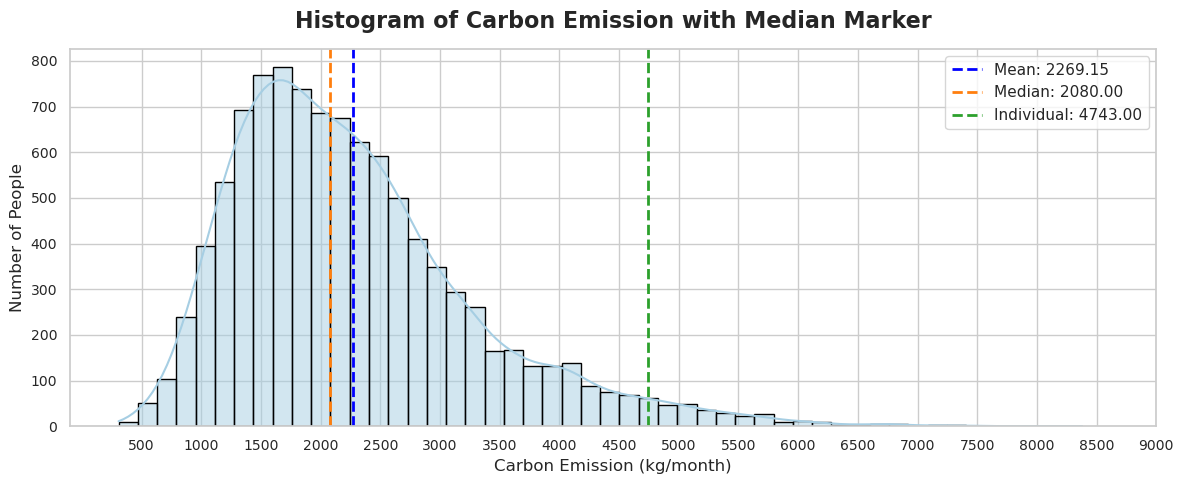

In [107]:
plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")  # Clean background style

# Histogram with kernel density estimate (KDE) for smoother visualization
sns.histplot(df['CarbonEmission'], bins=50, color='#A6CEE3', edgecolor='black', kde=True)

# Add vertical lines for mean, median, and individual value with cleaner styling
#plt.axvline(df['CarbonEmission'].mean(), color='#1F77B4', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(df['CarbonEmission'].mean(), color='blue', linestyle='--', label=f'Mean: {mean:.2f}', linewidth=2)
plt.axvline(median_CE, color='#FF7F0E', linestyle='--', linewidth=2, label=f'Median: {median_CE:.2f}')
plt.axvline(selected_row['CarbonEmission'], color='#2CA02C', linestyle='--', linewidth=2, label=f'Individual: {individual:.2f}')

# Add legend with a frame for better visibility
plt.legend(loc='upper right', frameon=True)

# Improve title and axis labels aesthetics
plt.title('Histogram of Carbon Emission with Median Marker', fontsize=16, weight='bold', pad=15)
plt.xlabel('Carbon Emission (kg/month)', fontsize=12)
plt.ylabel('Number of People', fontsize=12)

# Adjust ticks and grid style
plt.xticks(range(500, 9001, 500), fontsize=10)
plt.yticks(fontsize=10)

# Final adjustments
plt.tight_layout()
plt.show()

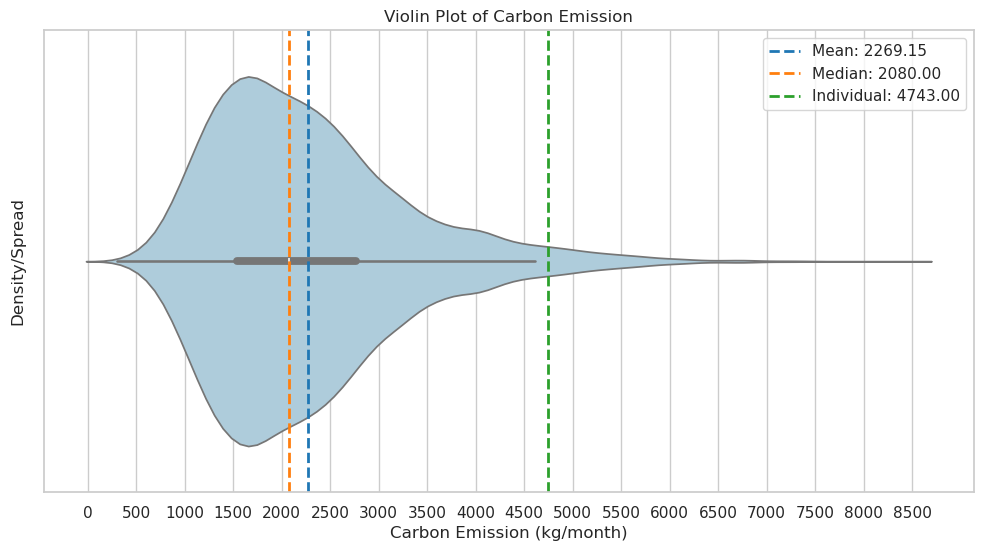

In [108]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['CarbonEmission'], color='#A6CEE3')

# Add vertical lines for mean, median, and individual value
plt.axvline(df['CarbonEmission'].mean(), color='#1F77B4', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median_CE, color='#FF7F0E', linestyle='--', linewidth=2, label=f'Median: {median_CE:.2f}')
plt.axvline(selected_row['CarbonEmission'], color='#2CA02C', linestyle='--', linewidth=2, label=f'Individual: {individual:.2f}')

# Set x-axis ticks every 500 units
plt.xticks(range(0, int(df['CarbonEmission'].max()) + 500, 500))
plt.ylabel('Density/Spread')

plt.legend(loc='upper right')
plt.title('Violin Plot of Carbon Emission')
plt.xlabel('Carbon Emission (kg/month)')
plt.show()

In [176]:
parameters = []
parameters = [(209.32695337036634, 'coal'),
 (226.18317503997898, 'electricity'),
 (7.669612228566583, 'natural gas'),
 (9.186609440980124, 'wood'),
 (59.33974944199982, 'private'),
 (87.59701334569431, 'public'),
 (28.257263903694355, 'walk/bicycle'),
 (203.82392805700292, 'diesel'),
 (1052.3751464029094, 'electric'),
 (226.6928482873863, 'hybrid'),
 (333.856348384034, 'lpg'),
 (800.7274676912599, 'petrol'),
 (0.20770529391801346, 'Vehicle Monthly Distance Km'),
 (440.8459170141105, 'Frequency of Traveling by Air'),
 (202.35218608701445, 'extra large waste bag'),
 (63.792123296977955, 'large waste bag'),
 (69.14157052281868, 'medium waste bag'),
 (79.22862176805614, 'Waste Bag Weekly Count'),
 (197.0027388611744, 'small waste bag')]
print(parameters)
print(len(parameters))

[(209.32695337036634, 'coal'), (226.18317503997898, 'electricity'), (7.669612228566583, 'natural gas'), (9.186609440980124, 'wood'), (59.33974944199982, 'private'), (87.59701334569431, 'public'), (28.257263903694355, 'walk/bicycle'), (203.82392805700292, 'diesel'), (1052.3751464029094, 'electric'), (226.6928482873863, 'hybrid'), (333.856348384034, 'lpg'), (800.7274676912599, 'petrol'), (0.20770529391801346, 'Vehicle Monthly Distance Km'), (440.8459170141105, 'Frequency of Traveling by Air'), (202.35218608701445, 'extra large waste bag'), (63.792123296977955, 'large waste bag'), (69.14157052281868, 'medium waste bag'), (79.22862176805614, 'Waste Bag Weekly Count'), (197.0027388611744, 'small waste bag')]
19


In [177]:
heat_source = parameters[:4]
print(heat_source)
heat_source = [value for _,value in heat_source]
print(heat_source)

[(209.32695337036634, 'coal'), (226.18317503997898, 'electricity'), (7.669612228566583, 'natural gas'), (9.186609440980124, 'wood')]
['coal', 'electricity', 'natural gas', 'wood']


In [178]:
mode_transport = parameters[4:6]
print(mode_transport)
mode_transport = [value for _,value in mode_transport]
print(mode_transport)

[(59.33974944199982, 'private'), (87.59701334569431, 'public')]
['private', 'public']


In [179]:
vehicle_type = parameters[6:12]
print(vehicle_type)
vehicle_type = [value for _,value in vehicle_type]
print(vehicle_type)

[(28.257263903694355, 'walk/bicycle'), (203.82392805700292, 'diesel'), (1052.3751464029094, 'electric'), (226.6928482873863, 'hybrid'), (333.856348384034, 'lpg'), (800.7274676912599, 'petrol')]
['walk/bicycle', 'diesel', 'electric', 'hybrid', 'lpg', 'petrol']


In [180]:
vehicle_distance = parameters[12][1]
print(vehicle_distance)

Vehicle Monthly Distance Km


In [181]:
air_travel_freq = parameters[13][1]
print(air_travel_freq)

Frequency of Traveling by Air


In [182]:
waste_bag = []
for item in parameters:
    if (item[1] == 'Waste Bag Weekly Count' or 'waste' in item[1]):
        waste_bag.append(item)

print(waste_bag)
waste_bag = [value for _,value in waste_bag]
print(waste_bag)

[(202.35218608701445, 'extra large waste bag'), (63.792123296977955, 'large waste bag'), (69.14157052281868, 'medium waste bag'), (79.22862176805614, 'Waste Bag Weekly Count'), (197.0027388611744, 'small waste bag')]
['extra large waste bag', 'large waste bag', 'medium waste bag', 'Waste Bag Weekly Count', 'small waste bag']


In [183]:
print(selected_row)

coal                                 1
electricity                          0
natural gas                          0
wood                                 0
private                              1
public                               0
walk/bicycle                         0
diesel                               1
electric                             0
hybrid                               0
lpg                                  0
petrol                               0
Vehicle Monthly Distance Km       8457
Frequency of Traveling by Air        3
extra large waste bag                0
large waste bag                      1
medium waste bag                     0
small waste bag                      0
Waste Bag Weekly Count               1
CarbonEmission                    4743
lower_half_median                False
Name: 4, dtype: object


In [184]:
#type(selected_row)
print(selected_row.index[19])
print(list(selected_row))
len(list(selected_row))
#print(selected_row)

CarbonEmission
[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 8457, 3, 0, 1, 0, 0, 1, 4743, False]


21

In [185]:
selected_row_update = selected_row.iloc[:-1]
print(selected_row_update)
#print(len(list(selected_row_update)))
#print(len(parameters))

parameters_checked = [None] * len(parameters)
for i in range(len(parameters)):
    #print(i)
    for j in range(len(list(selected_row_update))):
        #print(j)
        if(parameters[i][1]) == selected_row.index[j]:
            #parameters_checked.append(parameters[i])
            parameters_checked[j] = parameters[i]
            
print(parameters)
print(parameters_checked)
print(selected_row.loc['CarbonEmission'])

row = selected_row_update.to_dict()

coal                                1
electricity                         0
natural gas                         0
wood                                0
private                             1
public                              0
walk/bicycle                        0
diesel                              1
electric                            0
hybrid                              0
lpg                                 0
petrol                              0
Vehicle Monthly Distance Km      8457
Frequency of Traveling by Air       3
extra large waste bag               0
large waste bag                     1
medium waste bag                    0
small waste bag                     0
Waste Bag Weekly Count              1
CarbonEmission                   4743
Name: 4, dtype: object
[(209.32695337036634, 'coal'), (226.18317503997898, 'electricity'), (7.669612228566583, 'natural gas'), (9.186609440980124, 'wood'), (59.33974944199982, 'private'), (87.59701334569431, 'public'), (28.257263903694355, 

In [186]:
print(row)

{'coal': 1, 'electricity': 0, 'natural gas': 0, 'wood': 0, 'private': 1, 'public': 0, 'walk/bicycle': 0, 'diesel': 1, 'electric': 0, 'hybrid': 0, 'lpg': 0, 'petrol': 0, 'Vehicle Monthly Distance Km': 8457, 'Frequency of Traveling by Air': 3, 'extra large waste bag': 0, 'large waste bag': 1, 'medium waste bag': 0, 'small waste bag': 0, 'Waste Bag Weekly Count': 1, 'CarbonEmission': 4743}


In [189]:
import random
import copy

parameters = {value: key for key,value in parameters_checked}
print(parameters)
# # Learned parameters from linear regression
# parameters = {
#     'coal': 209.32695337036634, 'electricity': 226.18317503997898, 'natural gas': 7.669612228566583, 'wood': 9.186609440980124,
#     'private': 59.33974944199982, 'public': 87.59701334569431,
#     'walk/bicycle': 28.257263903694355, 'diesel': 203.82392805700292, 'electric': 1052.3751464029094, 'hybrid': 226.6928482873863,
#     'lpg': 333.856348384034, 'petrol': 800.7274676912599,
#     'Vehicle Monthly Distance Km': 0.20770529391801346, 'Frequency of Traveling by Air': 440.8459170141105,
#     'extra large waste bag': 202.35218608701445, 'large waste bag': 63.792123296977955, 'medium waste bag': 69.14157052281868,
#     'Waste Bag Weekly Count': 79.22862176805614, 'small waste bag': 197.0027388611744
# }

# Grouping of parameters
# heat_source = ['coal', 'electricity', 'natural gas', 'wood']
# vehicle_type = ['walk/bicycle', 'diesel', 'electric', 'hybrid', 'lpg', 'petrol']
# vehicle_distance = 'Vehicle Monthly Distance Km'
# air_travel_freq = 'Frequency of Traveling by Air'
# waste_bag = ['extra large waste bag', 'large waste bag', 'medium waste bag', 'Waste Bag Weekly Count', 'small waste bag']
# mode_transport = ['private', 'public']

# Function to calculate carbon emissions
def calculate_emission(row):
    return sum(row[label] * parameters[label] for label in row if label in parameters)

# Function to identify top 2 contributing groups
def find_top_contributors(row):
    contributions = {
        'heat_source': sum(row[label] * parameters[label] for label in heat_source if row.get(label, 0) == 1),
        'vehicle_type': sum(row[label] * parameters[label] for label in vehicle_type if row.get(label, 0) == 1),
        'vehicle_distance': row.get(vehicle_distance, 0) * parameters.get(vehicle_distance, 0),
        'air_travel_freq': row.get(air_travel_freq, 0) * parameters.get(air_travel_freq, 0),
        'waste_bag': sum(row[label] * parameters[label] for label in waste_bag if row.get(label, 0) == 1),
        'mode_transport': sum(row[label] * parameters[label] for label in mode_transport if row.get(label, 0) == 1),
    }
    
    sorted_contributions = sorted(contributions.items(), key=lambda x: x[1], reverse=True)
    return sorted_contributions[:2]

# Function to suggest changes based on constraints
def suggest_changes(row):
    new_row = copy.deepcopy(row)

    # Identify top 2 contributors
    top_contributors = find_top_contributors(row)

    print("\nTop Contributors:", top_contributors)  # Debugging print

    for group, _ in top_contributors:
        print(f"Processing group: {group}")  # Debugging print

        if group == 'heat_source':
            current = [label for label in heat_source if new_row.get(label, 0) == 1]
            print(f"Current heat source selected: {current}")  # Debugging print

            if current:
                current = current[0]
                new_choice = random.choice([x for x in heat_source if x != current])
                print(f"Suggested new heat source: {new_choice}")  # Debugging print
                new_row[current] = 0
                new_row[new_choice] = 1
        
        if group == 'vehicle_type':
            if new_row['public'] == 0:
                current = [label for label in vehicle_type if new_row.get(label, 0) == 1]
                print(f"Current vehicle type selected: {current}")  # Debugging print

                if current:
                    current = current[0]
                    new_choice = random.choice([x for x in vehicle_type if x != current])
                    print(f"Suggested new vehicle type: {new_choice}")  # Debugging print
                    new_row[current] = 0
                    new_row[new_choice] = 1

        if group == 'mode_transport':
            current = [label for label in mode_transport if new_row.get(label, 0) == 1]
            if current:
                current = current[0]
                new_choice = random.choice([x for x in mode_transport if x != current])
                new_row[current] = 0
                new_row[new_choice] = 1

                if new_choice == 'public':
                    for label in vehicle_type:
                        new_row[label] = 0
        
        if group == 'vehicle_distance':
            if vehicle_distance in new_row:
                #new_row[vehicle_distance] = int(new_row[vehicle_distance] * 0.9)
                reduction_factor = random.uniform(0.75, 0.9)  # Reduce by up to 25%
                new_row[vehicle_distance] = int(new_row[vehicle_distance] * reduction_factor)

        if group == 'air_travel_freq':
            if row.get(air_travel_freq, 0) > 0:
                new_row[air_travel_freq] = max(1, new_row.get(air_travel_freq, 0) - 1)

        if group == 'waste_bag':
            if row.get('Waste Bag Weekly Count', 0) > 0:
                new_row['Waste Bag Weekly Count'] = max(1, new_row.get('Waste Bag Weekly Count', 0) - 1)

    print("\nNew Row after changes:", new_row)  # Debugging print

    return new_row

# Function to optimize row for 10% reduction
def optimize_row(row):
    target_emission = row['CarbonEmission'] * 0.90  # 10% reduction target
    print(type(row['CarbonEmission']))
    best_row = row.copy()
    best_emission = row['CarbonEmission']
    print(best_emission)

    for _ in range(10):
        new_row = suggest_changes(row)
        print("\nNew Row inside function:", new_row)  # Debugging print
        new_emission = row['CarbonEmission'] - (calculate_emission(row) - calculate_emission(new_row))

        print(f"New Emission: {new_emission}")  # Debugging print

        if new_emission < best_emission and new_emission <= target_emission:
            best_row = new_row.copy()
            best_emission = new_emission
            best_row['CarbonEmission'] = best_emission
    return best_row, best_emission


# # Sample row
# row = {
#     'coal': 1, 'electricity': 0, 'natural gas': 0, 'wood': 0,
#     'private': 1, 'public': 0,
#     'walk/bicycle': 0, 'diesel': 1, 'electric': 0, 'hybrid': 0, 'lpg': 0, 'petrol': 0,
#     'Vehicle Monthly Distance Km': 8457, 'Frequency of Traveling by Air': 3,
#     'extra large waste bag': 0, 'large waste bag': 1, 'medium waste bag': 0,
#     'small waste bag': 0, 'Waste Bag Weekly Count': 1,
#     'CarbonEmission': 4743
# }

# Run optimization
optimized_row, new_emission = optimize_row(row)

# Display results
print("\nOriginal Emission:", row['CarbonEmission'])
print("Target Emission (10% Reduction):", row['CarbonEmission'] * 0.90)
print("New Emission:", new_emission)

print("\nSuggested New Row:")
for key, value in optimized_row.items():
    print(f"{key}: {value}")


{'coal': 209.32695337036634, 'electricity': 226.18317503997898, 'natural gas': 7.669612228566583, 'wood': 9.186609440980124, 'private': 59.33974944199982, 'public': 87.59701334569431, 'walk/bicycle': 28.257263903694355, 'diesel': 203.82392805700292, 'electric': 1052.3751464029094, 'hybrid': 226.6928482873863, 'lpg': 333.856348384034, 'petrol': 800.7274676912599, 'Vehicle Monthly Distance Km': 0.20770529391801346, 'Frequency of Traveling by Air': 440.8459170141105, 'extra large waste bag': 202.35218608701445, 'large waste bag': 63.792123296977955, 'medium waste bag': 69.14157052281868, 'small waste bag': 197.0027388611744, 'Waste Bag Weekly Count': 79.22862176805614}
<class 'int'>
4743

Top Contributors: [('vehicle_distance', 1756.5636706646399), ('air_travel_freq', 1322.5377510423316)]
Processing group: vehicle_distance
Processing group: air_travel_freq

New Row after changes: {'coal': 1, 'electricity': 0, 'natural gas': 0, 'wood': 0, 'private': 1, 'public': 0, 'walk/bicycle': 0, 'dies

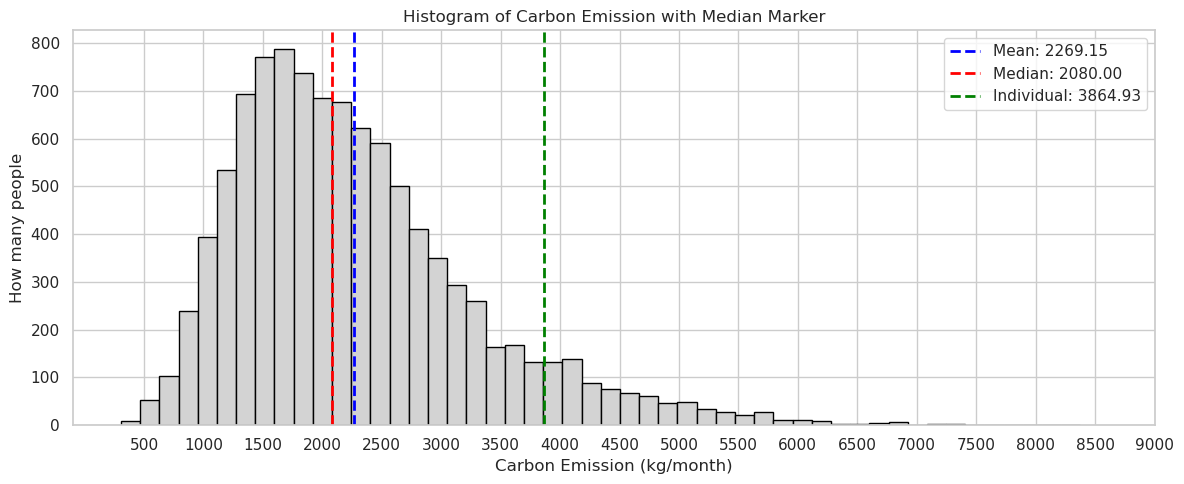

In [190]:
# Create Histogram
#plt.subplot(1, 2, 2)  # Histogram
plt.figure(figsize=(12, 5))
plt.hist(df['CarbonEmission'], bins=50, color='lightgray', edgecolor='black')
# add mean as orange line
plt.axvline(df['CarbonEmission'].mean(), color='blue', linestyle='--', label=f'Mean: {mean:.2f}', linewidth=2)
plt.axvline(median_CE, color='red', linestyle='dashed', label=f'Median: {median_CE:.2f}', linewidth=2)  # Line for the median
plt.axvline(new_emission, color='green', linestyle='dashed', label=f'Individual: {new_emission:.2f}', linewidth=2)  # Line for the new emission
plt.legend(loc='upper right') 
plt.title('Histogram of Carbon Emission with Median Marker')
plt.xlabel('Carbon Emission (kg/month)')
plt.ylabel('How many people')
plt.xticks(range(500, 9001, 500))  # Set tick positions every 10 units

# Adjust layout and display the plot
plt.tight_layout()
plt.show()